C:\Users\Danne\AppData\Local\Temp\ipykernel_20980\3753529583.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-white")


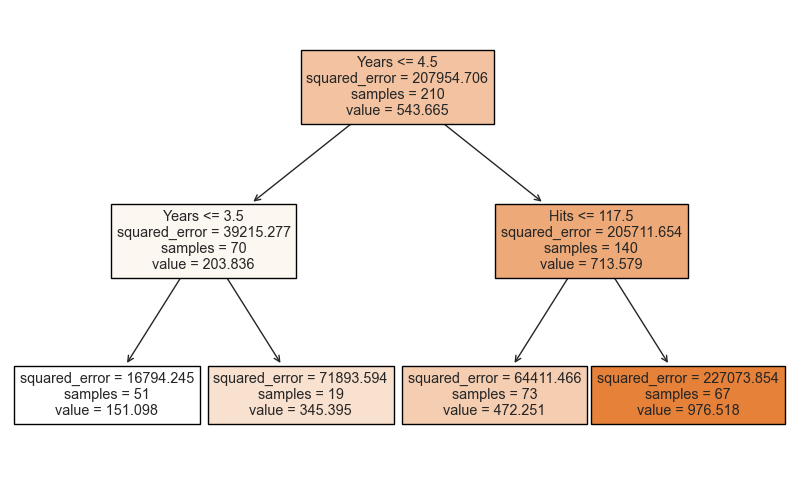

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, _tree, plot_tree
import matplotlib.pyplot as plt

class CustomDecisionTreeRegressor(DecisionTreeRegressor):
    def _fit_tree(self, builder, X, y, sample_weight, X_idx_sorted):
        super()._fit_tree(builder, X, y, sample_weight, X_idx_sorted)
        if builder.tree_.node_count > 3:
            raise ValueError("Unexpected node count")
        builder.tree_.threshold[0] = 5
        builder.tree_.threshold[1] = 100

plt.style.use("seaborn-white")
df = pd.read_csv("../data/Hitters.csv")

df = df.dropna()
X = df[['Years', 'Hits']].to_numpy()
y = df['Salary'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree = CustomDecisionTreeRegressor(max_depth=2, random_state=42)
tree.fit(X_train, y_train)

# Plot the decision tree
fig, ax = plt.subplots(figsize=(10, 6))
plot_tree(tree, filled=True, feature_names=['Years', 'Hits'], class_names=['Salary'], ax=ax)
plt.show()



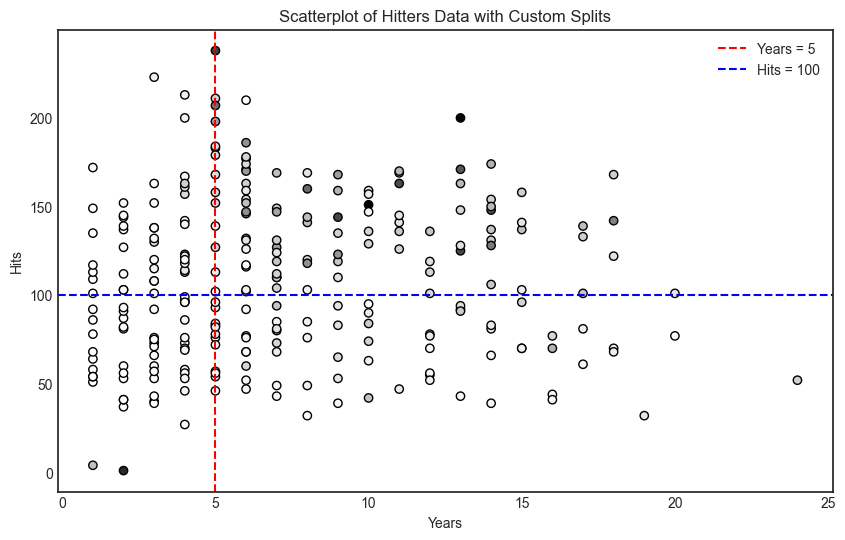

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
ax.axvline(x=5, color='r', linestyle='--', label='Years = 5')
ax.axhline(y=100, color='b', linestyle='--', label='Hits = 100')
ax.set_xlabel('Years')
ax.set_ylabel('Hits')
ax.set_title('Scatterplot of Hitters Data with Custom Splits')
ax.legend()
plt.show()